# Import Packages and Data set

In [1]:
# EDA - Data Cleaning
import pandas as pd
import numpy as np
import missingno
from collections import Counter
import math

# EDA - Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

#Modeling
from sklearn import (datasets,
                     metrics,
                     model_selection as skms,
                     naive_bayes,
                     neighbors)

from sklearn.linear_model import (LogisticRegression)

from sklearn.model_selection import (cross_val_score,
                                     cross_val_predict,
                                     train_test_split,
                                     GridSearchCV)
from sklearn.preprocessing import RobustScaler

from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score,
                             confusion_matrix,
                             f1_score,
                             roc_curve,
                             auc,
                             classification_report,
                             precision_recall_curve)

from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor


# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# logistic regression model
import statsmodels.api as sm 

pd.set_option('display.max_rows', 90)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

pd.options.display.float_format = '{:.2f}'.format

# Define Functions

In [2]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("Initial Accuracy Score:  {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))),'-'*40)
            
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n") 
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test)))) 
        print("Initial Accuracy Score:  {0:.4f}".format(accuracy_score(y_test, clf.predict(X_test))))

# Import Dataset

In [3]:
df = pd.read_csv('modified/finalproject_df.csv')

# Review Dependant Variable Split (DV)

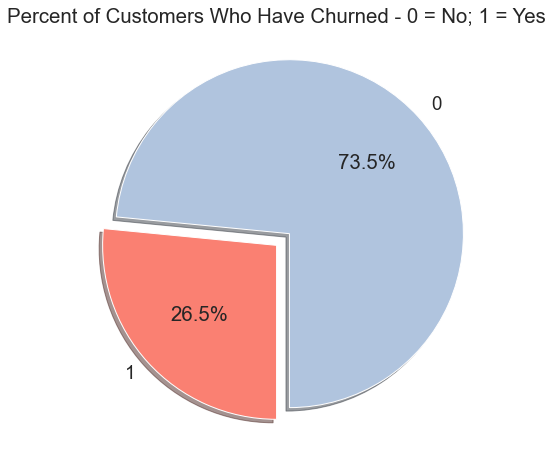

In [4]:
# Data to plot for the % of target variable
sns.set(font_scale = 1.7)
labels =df['Churn'].value_counts(sort = True).index
sizes = df['Churn'].value_counts(sort = True)
colors = ["lightsteelblue","salmon"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percent of Customers Who Have Churned - 0 = No; 1 = Yes')
plt.show()

# Logistic Regression - Initial Run

## Generate Dummy Variables

In [5]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1.00,No phone service,DSL,No,Yes,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34.00,No,DSL,Yes,No,Yes,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2.00,No,DSL,Yes,Yes,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45.00,No phone service,DSL,Yes,No,Yes,Yes,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2.00,No,Fiber optic,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24.00,Yes,DSL,Yes,No,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72.00,Yes,Fiber optic,No,Yes,Yes,No,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11.00,No phone service,DSL,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4.00,Yes,Fiber optic,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [6]:
binary_cols=[]
multi_Value=[]
for col in df.columns:
    if df[col].dtype =='object':
        if df[col].unique().shape[0]==2:
            binary_cols.append(col)
        else:
            multi_Value.append(col)
            
multi_Value

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [7]:
for col in df.dtypes[df.dtypes == object].index:
    print(col,'\n', df[col].unique())

gender 
 ['Female' 'Male']
MultipleLines 
 ['No phone service' 'No' 'Yes']
InternetService 
 ['DSL' 'Fiber optic' 'No']
OnlineSecurity 
 ['No' 'Yes' 'No internet service']
OnlineBackup 
 ['Yes' 'No' 'No internet service']
DeviceProtection 
 ['No' 'Yes' 'No internet service']
TechSupport 
 ['No' 'Yes' 'No internet service']
StreamingMovies 
 ['No' 'Yes' 'No internet service']
Contract 
 ['Month-to-month' 'One year' 'Two year']
PaymentMethod 
 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [8]:
gend = pd.get_dummies(df['gender'], prefix='gender', drop_first=True)
df1 = df.join(gend)

contr = pd.get_dummies(df['Contract'], prefix='Contract').drop(columns=['Contract_One year'])
df1 = df1.join(contr)

pmtmth = pd.get_dummies(df['PaymentMethod'], prefix='PaymentMethod', drop_first=True)
df1 = df1.join(pmtmth)

intsvc = pd.get_dummies(df['InternetService'], prefix='InternetService').drop(columns=['InternetService_No'])
df1 = df1.join(intsvc)

multi = pd.get_dummies(df['MultipleLines'], prefix='MultipleLines').drop(columns=['MultipleLines_No phone service'])
df1 = df1.join(multi)

onlsec = pd.get_dummies(df['OnlineSecurity'], prefix='OnlineSecurity').drop(columns=['OnlineSecurity_No internet service'])
df1 = df1.join(onlsec)

onlbac = pd.get_dummies(df['OnlineBackup'], prefix='OnlineBackup').drop(columns=['OnlineBackup_No internet service'])
df1 = df1.join(onlbac)

devpro = pd.get_dummies(df['DeviceProtection'], prefix='DeviceProtection').drop(columns=['DeviceProtection_No internet service'])
df1 = df1.join(devpro)

tecsup = pd.get_dummies(df['TechSupport'], prefix='TechSupport').drop(columns=['TechSupport_No internet service'])
df1 = df1.join(tecsup)

strmov = pd.get_dummies(df['StreamingMovies'], prefix='StreamingMovies').drop(columns=['StreamingMovies_No internet service'])
df1 = df1.join(strmov)

In [9]:
df1.head(3).T

,0,1,2
gender,Female,Male,Male
SeniorCitizen,0,0,0
Partner,1,0,0
Dependents,0,0,0
tenure,1.00,34.00,2.00
MultipleLines,No phone service,No,No
InternetService,DSL,DSL,DSL
OnlineSecurity,No,Yes,Yes
OnlineBackup,Yes,No,Yes
DeviceProtection,No,Yes,No


In [10]:
#Dropping columns due to dummy variable additions
df2 = df1.drop(columns=['gender',
                        'Contract',
                        'PaymentMethod',
                        'InternetService',
                        'MultipleLines', 
                        'OnlineSecurity',
                        'OnlineBackup', 
                        'DeviceProtection', 
                        'TechSupport',
                        'StreamingMovies'
                       ])

In [11]:
df2

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,Contract_Month-to-month,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,1,0,1.00,1,29.85,29.85,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0
1,0,0,0,34.00,0,56.95,1889.50,0,1,0,0,0,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0
2,0,0,0,2.00,1,53.85,108.15,1,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0
3,0,0,0,45.00,0,42.30,1840.75,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0
4,0,0,0,2.00,1,70.70,151.65,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24.00,1,84.80,1990.50,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1
7039,0,1,1,72.00,1,103.20,7362.90,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1
7040,0,1,1,11.00,1,29.60,346.45,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0
7041,1,1,0,4.00,1,74.40,306.60,1,1,1,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0


## Review Data Correlations

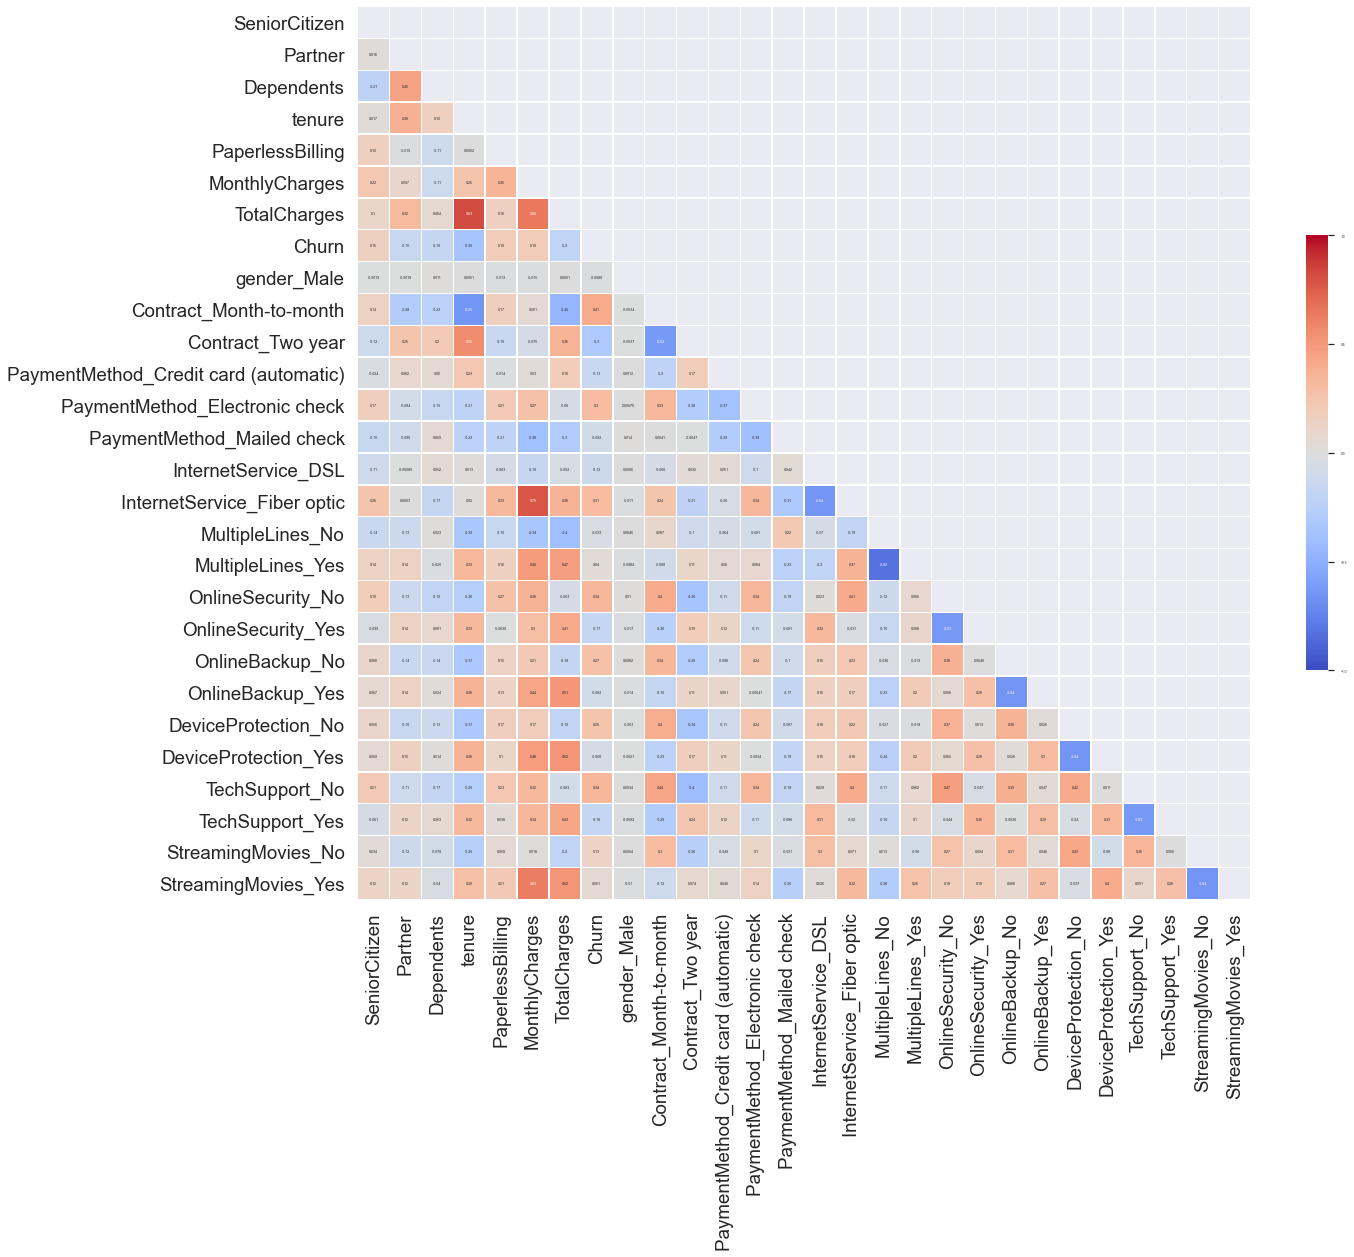

In [12]:
corr_matrix = df2.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(20, 20))

sns.set(font_scale = .3)

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True)


#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [13]:
matrix = pd.DataFrame(df2.corr())
# matrix.to_excel('matrix.xlsx', index=False)

In [14]:
# Output any correlated values over 0.65 - isolating high-correlated variables to remove from the analysis
def high_corr_and_check(X):
    corr_matrix = X.corr().abs()
    sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), 
                                     k=1).astype(np.bool))
                      .stack()
                      .sort_values(ascending=False))
    for index, value in sol.items():
        if value > 0.65:
            print(index,value)
            
high_corr_and_check(df2)

('tenure', 'TotalCharges') 0.8261051034659136
('MultipleLines_No', 'MultipleLines_Yes') 0.8228533739769971
('MonthlyCharges', 'InternetService_Fiber optic') 0.787162915772791
('MonthlyCharges', 'TotalCharges') 0.6502855383177678


<b>Action: </b>Removed the highly correlated variables I believe would help the analysis:
+ MultipleLines_No

In [15]:
df2.drop(columns=['MultipleLines_No'], inplace=True)

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
SeniorCitizen                            7043 non-null int64
Partner                                  7043 non-null int64
Dependents                               7043 non-null int64
tenure                                   7043 non-null float64
PaperlessBilling                         7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7043 non-null float64
Churn                                    7043 non-null int64
gender_Male                              7043 non-null uint8
Contract_Month-to-month                  7043 non-null uint8
Contract_Two year                        7043 non-null uint8
PaymentMethod_Credit card (automatic)    7043 non-null uint8
PaymentMethod_Electronic check           7043 non-null uint8
PaymentMethod_Mailed check               7043 non-null uint8
InternetService_DSL              

## Split the Dataset

In [17]:
x = df2.drop(columns='Churn')

y = df2[['Churn']] 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                   test_size=0.73,
                                                   random_state=16,
                                                   stratify=y)

print('X_train shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)

X_train shape:  (1901, 26)
y_train.shape:  (1901, 1)
X_test.shape:  (5142, 26)


## Model

In [19]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), 
               family = sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 1901
Model:                            GLM   Df Residuals:                     1879
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -770.07
Date:                Mon, 03 May 2021   Deviance:                       1540.1
Time:                        21:03:02   Pearson chi2:                 2.20e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [20]:
logistic_regression1 = LogisticRegression(n_jobs=-1, random_state=15)
logistic_regression1.fit(X_train, y_train)

acc_logistic_regression1 = round(logistic_regression1.score(X_test, y_test) * 100, 2)
prec_logistic_regression1 = round(precision_score(y_pred=logistic_regression1.predict(X_test), y_true=y_test)* 100, 2)
recall_logistic_regression1 = round(recall_score(y_pred=logistic_regression1.predict(X_test), y_true=y_test)* 100, 2)
f1_logistic_regression1 = round(f1_score(y_pred=logistic_regression1.predict(X_test), y_true=y_test)* 100, 2)

print_score(logistic_regression1, X_train, y_train, X_test, y_test, train=True)
print_score(logistic_regression1, X_train, y_train, X_test, y_test, train=False)

res_1 = cross_val_score(logistic_regression1, X_train, y_train, scoring = 'accuracy', cv = 10)

Train Result:

Initial Accuracy Score:  0.8106
 ----------------------------------------
Test Result:

Confusion Matrix: 
 [[3407  370]
 [ 660  705]]

Initial Accuracy Score:  0.7997


## Confusion Matrix

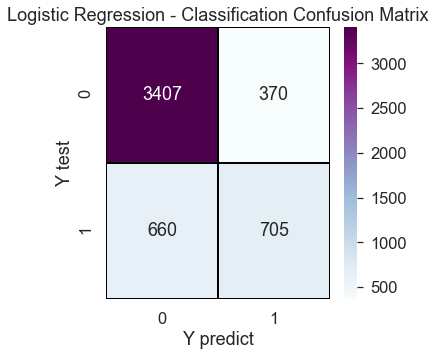

In [21]:
# The confusion matrix
sns.set(font_scale = 1.5)
logistic_regression_cm = confusion_matrix(y_test, 
                                          logistic_regression1.predict(X_test))
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logistic_regression_cm, 
            annot=True, 
            linewidth=0.7, 
            linecolor='black', 
            fmt='g', 
            ax=ax, 
            cmap="BuPu")
plt.title('Logistic Regression - Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

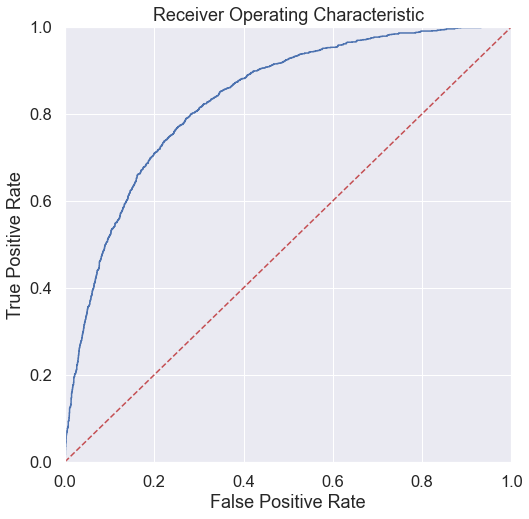

In [22]:
probs = logistic_regression1.predict_proba(X_test)
# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<b>Review: </b>There are a total of 16 variables that are significant. Below are the variables to select when re-running the model:

1) Senior Citizen
2) PaperlessBilling
3) TotalCharges
4) Contract_Month-to-month
5) PaymentMethod_Electronic check
6) InternetService_Fiber optic
7) MultipleLines_Yes
8) OnlineSecurity_No
9) OnlineSecurity_Yes
10) OnlineBackup_No
11) OnlineBackup_Yes
12) DeviceProtection_No
13) DeviceProtection_Yes
14) TechSupport_No
15) TechSupport_Yes
16) StreamingMovies_Yes

# Logistic Regression - Second Run

In [23]:
df3 = df2[['Churn',
           'SeniorCitizen', 
           'PaperlessBilling', 
           'TotalCharges',
           'Contract_Month-to-month', 
           'PaymentMethod_Electronic check', 
           'InternetService_Fiber optic', 
           'MultipleLines_Yes', 
           'OnlineSecurity_No', 
           'OnlineSecurity_Yes',
           'OnlineBackup_No', 
           'OnlineBackup_Yes', 
           'DeviceProtection_No', 
           'DeviceProtection_Yes', 
           'TechSupport_No', 
           'TechSupport_Yes', 
           'StreamingMovies_Yes']]

## Review Data Correlations

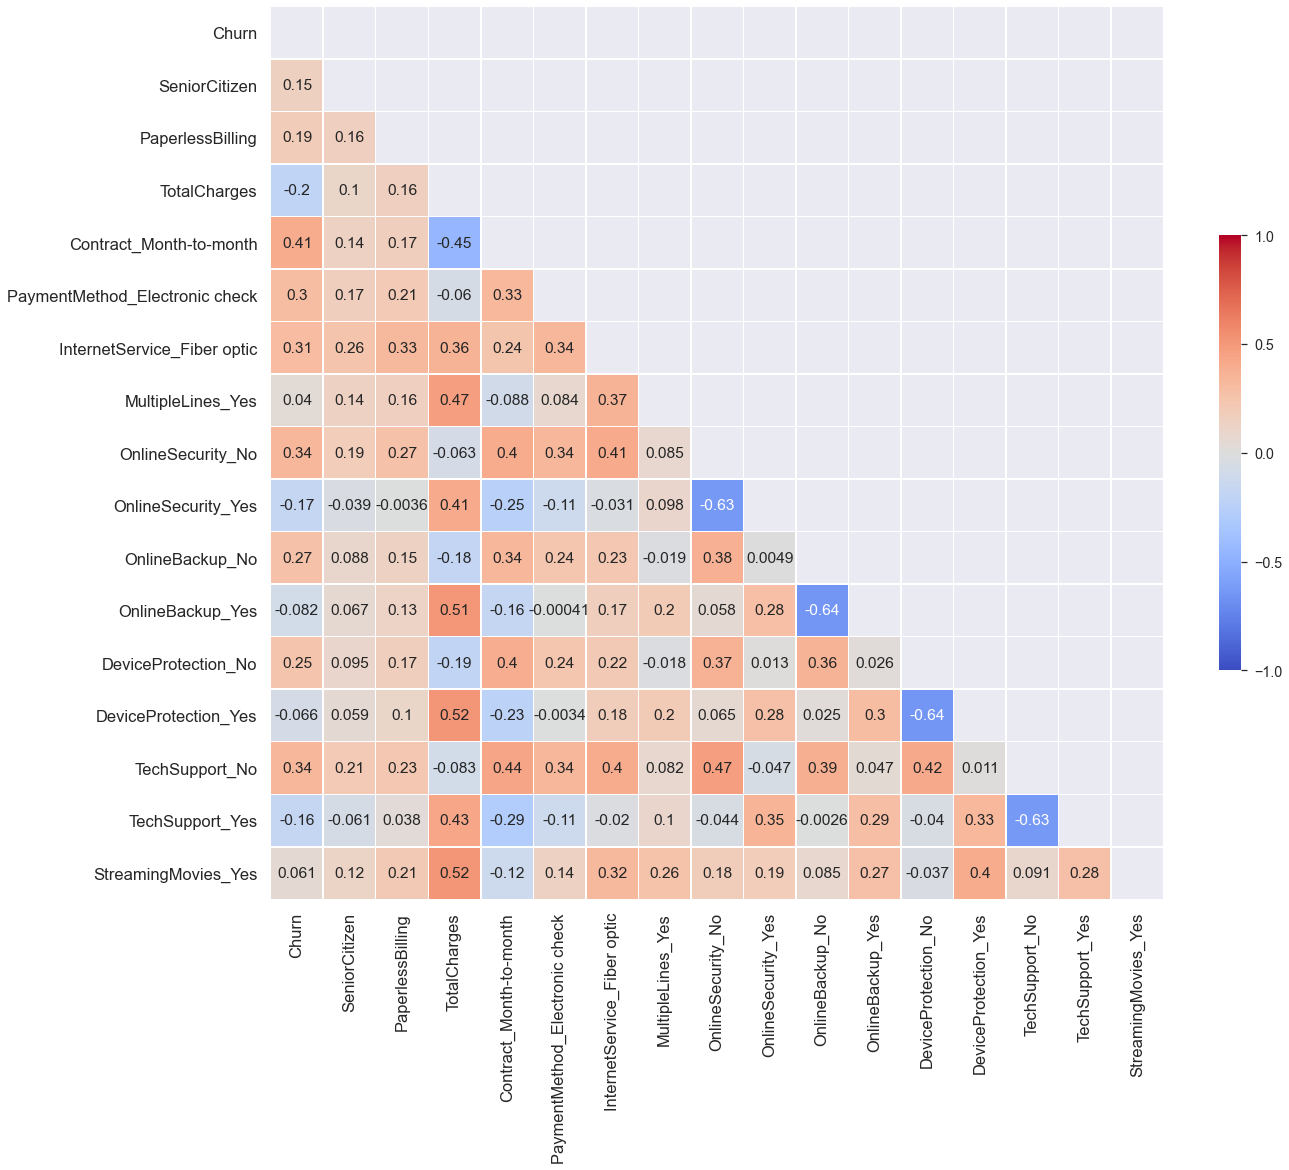

In [24]:
corr_matrix = df3.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(20, 20))

sns.set(font_scale = 1.3)

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True)


#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [25]:
# Output any correlated values over 0.65 - isolating high-correlated variables to remove from the analysis
def high_corr_and_check(X):
    corr_matrix = X.corr().abs()
    sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), 
                                     k=1).astype(np.bool))
                      .stack()
                      .sort_values(ascending=False))
    for index, value in sol.items():
        if value > 0.65:
            print(index,value)
            
high_corr_and_check(df3)

<b>Action: </b>There are no highly correlated variables I believe would help the analysis to remove.

In [26]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
Churn                             7043 non-null int64
SeniorCitizen                     7043 non-null int64
PaperlessBilling                  7043 non-null int64
TotalCharges                      7043 non-null float64
Contract_Month-to-month           7043 non-null uint8
PaymentMethod_Electronic check    7043 non-null uint8
InternetService_Fiber optic       7043 non-null uint8
MultipleLines_Yes                 7043 non-null uint8
OnlineSecurity_No                 7043 non-null uint8
OnlineSecurity_Yes                7043 non-null uint8
OnlineBackup_No                   7043 non-null uint8
OnlineBackup_Yes                  7043 non-null uint8
DeviceProtection_No               7043 non-null uint8
DeviceProtection_Yes              7043 non-null uint8
TechSupport_No                    7043 non-null uint8
TechSupport_Yes                   7043 non-null uint8
StreamingMovies_Yes        

## Split the Dataset

In [27]:
x = df3.drop(columns='Churn')

y = df3[['Churn']] 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                   test_size=0.73,
                                                   random_state=16,
                                                   stratify=y)

print('X_train shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)

X_train shape:  (1901, 16)
y_train.shape:  (1901, 1)
X_test.shape:  (5142, 16)


## Model

In [29]:
# Logistic regression model
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), 
               family = sm.families.Binomial())
print(logm2.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 1901
Model:                            GLM   Df Residuals:                     1887
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -790.49
Date:                Mon, 03 May 2021   Deviance:                       1581.0
Time:                        21:03:14   Pearson chi2:                 1.82e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [30]:
logistic_regression2 = LogisticRegression(n_jobs=-1, random_state=15)
logistic_regression2.fit(X_train, y_train)

acc_logistic_regression2 = round(logistic_regression2.score(X_test, y_test) * 100, 2)
prec_logistic_regression2 = round(precision_score(y_pred=logistic_regression2.predict(X_test), y_true=y_test)* 100, 2)
recall_logistic_regression2 = round(recall_score(y_pred=logistic_regression2.predict(X_test), y_true=y_test)* 100, 2)
f1_logistic_regression2 = round(f1_score(y_pred=logistic_regression2.predict(X_test), y_true=y_test)* 100, 2)

print_score(logistic_regression2, X_train, y_train, X_test, y_test, train=True)
print_score(logistic_regression2, X_train, y_train, X_test, y_test, train=False)

res_2 = cross_val_score(logistic_regression2, X_train, y_train, scoring = 'accuracy', cv = 10)

Train Result:

Initial Accuracy Score:  0.7991
 ----------------------------------------
Test Result:

Confusion Matrix: 
 [[3405  372]
 [ 664  701]]

Initial Accuracy Score:  0.7985


## Confusion Matrix

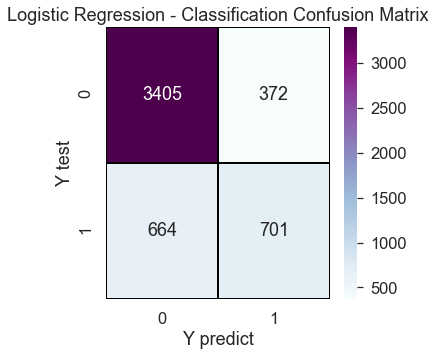

In [31]:
# The confusion matrix
sns.set(font_scale = 1.5)
logistic_regression_cm = confusion_matrix(y_test, 
                                          logistic_regression2.predict(X_test))
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logistic_regression_cm, 
            annot=True, 
            linewidth=0.7, 
            linecolor='black', 
            fmt='g', 
            ax=ax, 
            cmap="BuPu")
plt.title('Logistic Regression - Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

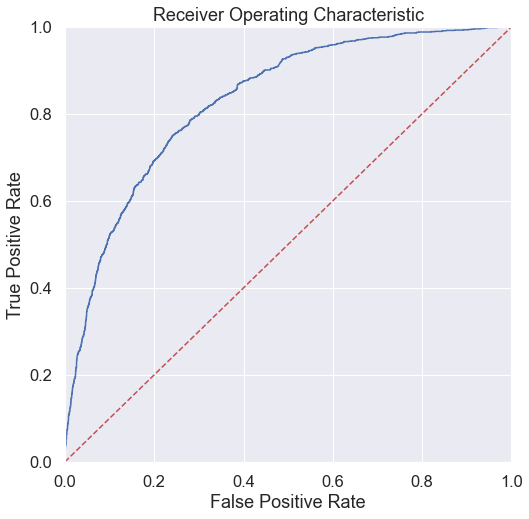

In [32]:
probs = logistic_regression2.predict_proba(X_test)
# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<b>Review: </b>After a second model run, I am going to drop the following columns and re-run:

1) TotalCharges - negative coef
2) MultipleLines_Yes - now insignificant p-value
3) OnlineSecurity_Yes - now insignificant p-value
4) OnlineBackup_Yes - now insignificant p-value
5) TechSupport_Yes - now insignificant p-value

# Logistic Regression - Third Run

In [33]:
df4 = df3.drop(columns=['TotalCharges',
                        'MultipleLines_Yes', 
                        'OnlineSecurity_Yes',
                        'OnlineBackup_Yes', 
                        'TechSupport_Yes'])

## Review Data Correlations

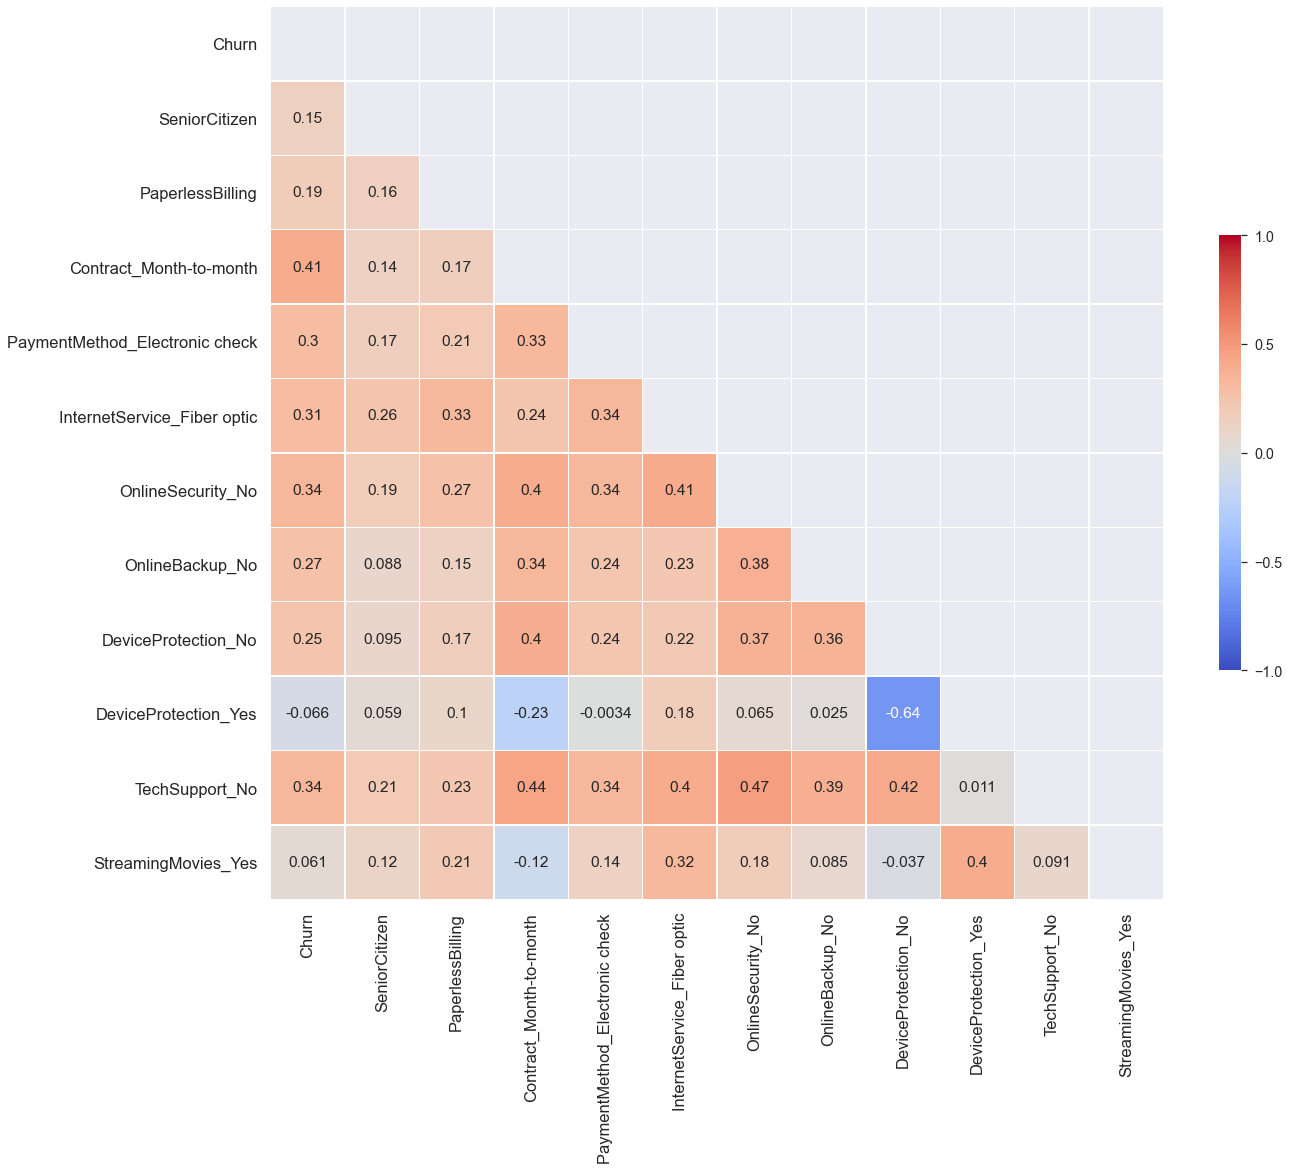

In [34]:
corr_matrix = df4.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(20, 20))

sns.set(font_scale = 1.3)

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True)


#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [35]:
# Output any correlated values over 0.65 - isolating high-correlated variables to remove from the analysis
def high_corr_and_check(X):
    corr_matrix = X.corr().abs()
    sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), 
                                     k=1).astype(np.bool))
                      .stack()
                      .sort_values(ascending=False))
    for index, value in sol.items():
        if value > 0.65:
            print(index,value)
            
high_corr_and_check(df4)

<b>Action: </b>There are no highly correlated variables I believe would help the analysis to remove.

In [36]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
Churn                             7043 non-null int64
SeniorCitizen                     7043 non-null int64
PaperlessBilling                  7043 non-null int64
Contract_Month-to-month           7043 non-null uint8
PaymentMethod_Electronic check    7043 non-null uint8
InternetService_Fiber optic       7043 non-null uint8
OnlineSecurity_No                 7043 non-null uint8
OnlineBackup_No                   7043 non-null uint8
DeviceProtection_No               7043 non-null uint8
DeviceProtection_Yes              7043 non-null uint8
TechSupport_No                    7043 non-null uint8
StreamingMovies_Yes               7043 non-null uint8
dtypes: int64(3), uint8(9)
memory usage: 227.1 KB


## Split the Dataset

In [37]:
x = df4.drop(columns='Churn')

y = df4[['Churn']] 

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                   test_size=0.73,
                                                   random_state=16,
                                                   stratify=y)

print('X_train shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)

X_train shape:  (1901, 11)
y_train.shape:  (1901, 1)
X_test.shape:  (5142, 11)


## Model

In [39]:
# Logistic regression model
logm3 = sm.GLM(y_train,(sm.add_constant(X_train)), 
               family = sm.families.Binomial())
print(logm3.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 1901
Model:                            GLM   Df Residuals:                     1889
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -814.54
Date:                Mon, 03 May 2021   Deviance:                       1629.1
Time:                        21:03:16   Pearson chi2:                 1.86e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [40]:
logistic_regression3 = LogisticRegression(n_jobs=-1, random_state=15)
logistic_regression3.fit(X_train, y_train)

acc_logistic_regression3 = round(logistic_regression3.score(X_test, y_test) * 100, 2)
prec_logistic_regression3 = round(precision_score(y_pred=logistic_regression3.predict(X_test), y_true=y_test)* 100, 2)
recall_logistic_regression3 = round(recall_score(y_pred=logistic_regression3.predict(X_test), y_true=y_test)* 100, 2)
f1_logistic_regression3 = round(f1_score(y_pred=logistic_regression3.predict(X_test), y_true=y_test)* 100, 2)

print_score(logistic_regression3, X_train, y_train, X_test, y_test, train=True)
print_score(logistic_regression3, X_train, y_train, X_test, y_test, train=False)

res_3 = cross_val_score(logistic_regression3, X_train, y_train, scoring = 'accuracy', cv = 10)

Train Result:

Initial Accuracy Score:  0.7896
 ----------------------------------------
Test Result:

Confusion Matrix: 
 [[3317  460]
 [ 661  704]]

Initial Accuracy Score:  0.7820


## Confusion Matrix

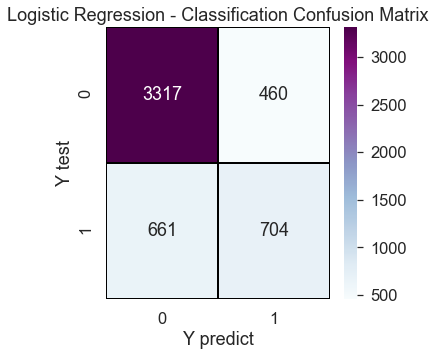

In [41]:
# The confusion matrix
sns.set(font_scale = 1.5)
logistic_regression_cm = confusion_matrix(y_test, 
                                          logistic_regression3.predict(X_test))
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logistic_regression_cm, 
            annot=True, 
            linewidth=0.7, 
            linecolor='black', 
            fmt='g', 
            ax=ax, 
            cmap="BuPu")
plt.title('Logistic Regression - Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

<b>Review: </b>After a second model run, I am going to drop the following columns and re-run:

1) SeniorCitizen - now insignificant p-value
2) DeviceProtection_No - now insignificant p-value
3) DeviceProtection_Yes - negative coef
4) StreamingMovies_Yes - now insignificant p-value

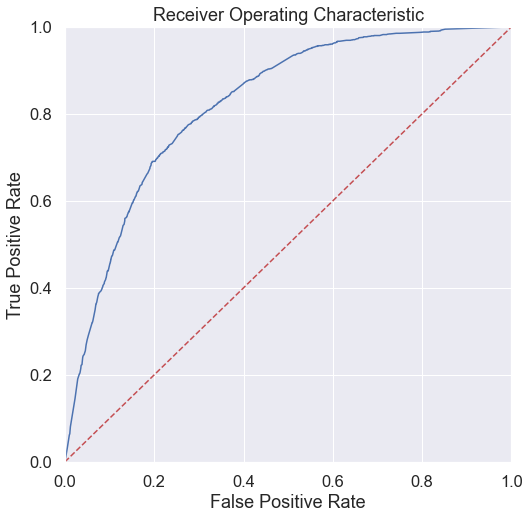

In [42]:
probs = logistic_regression3.predict_proba(X_test)
# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Logistic Regression - Forth Run

In [43]:
df5 = df4.drop(columns=['SeniorCitizen',
                        'DeviceProtection_No', 
                        'DeviceProtection_Yes',
                        'StreamingMovies_Yes'])

## Review Data Correlations

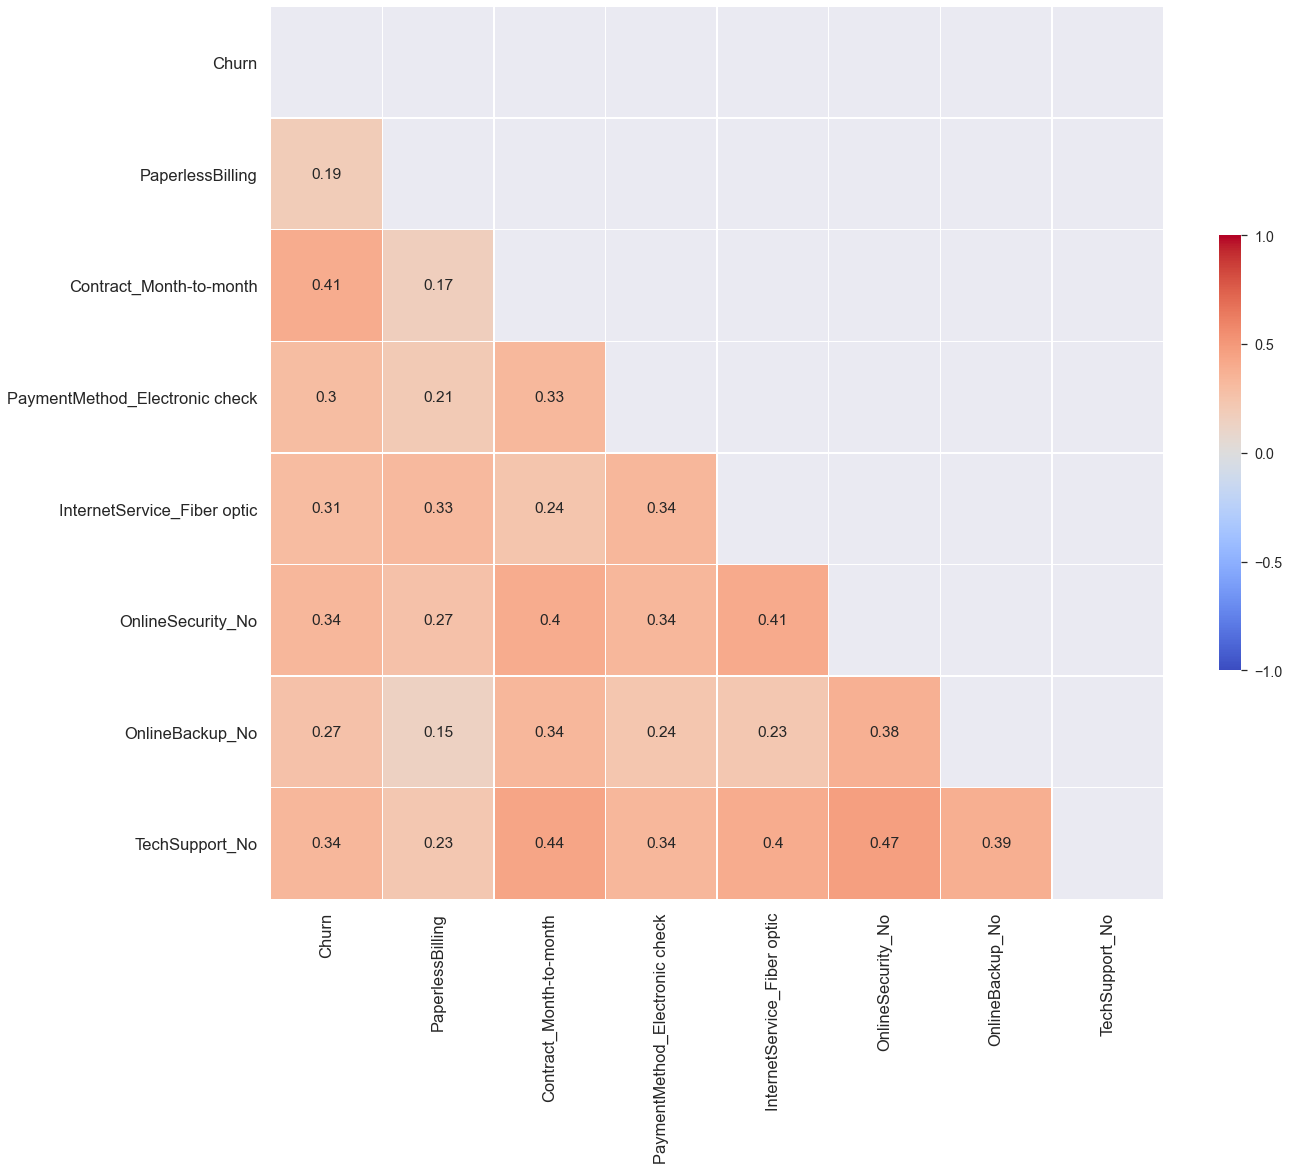

In [44]:
corr_matrix = df5.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(20, 20))

sns.set(font_scale = 1.3)

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True)


#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [45]:
# Output any correlated values over 0.65 - isolating high-correlated variables to remove from the analysis
def high_corr_and_check(X):
    corr_matrix = X.corr().abs()
    sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), 
                                     k=1).astype(np.bool))
                      .stack()
                      .sort_values(ascending=False))
    for index, value in sol.items():
        if value > 0.65:
            print(index,value)
            
high_corr_and_check(df5)

<b>Action: </b>There are no highly correlated variables I believe would help the analysis to remove.

In [46]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
Churn                             7043 non-null int64
PaperlessBilling                  7043 non-null int64
Contract_Month-to-month           7043 non-null uint8
PaymentMethod_Electronic check    7043 non-null uint8
InternetService_Fiber optic       7043 non-null uint8
OnlineSecurity_No                 7043 non-null uint8
OnlineBackup_No                   7043 non-null uint8
TechSupport_No                    7043 non-null uint8
dtypes: int64(2), uint8(6)
memory usage: 151.4 KB


## Split the Dataset

In [47]:
x = df5.drop(columns='Churn')

y = df5[['Churn']] 

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                   test_size=0.73,
                                                   random_state=16,
                                                   stratify=y)

print('X_train shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)

X_train shape:  (1901, 7)
y_train.shape:  (1901, 1)
X_test.shape:  (5142, 7)


## Model

In [49]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train)

logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), 
               family = sm.families.Binomial())
print(logm4.fit().summary())

res = logm4.fit()



                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 1901
Model:                            GLM   Df Residuals:                     1893
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -816.88
Date:                Mon, 03 May 2021   Deviance:                       1633.8
Time:                        21:03:17   Pearson chi2:                 1.85e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [50]:
logistic_regression4 = LogisticRegression(n_jobs=-1, random_state=15)
logistic_regression4.fit(X_train, y_train)

acc_logistic_regression4 = round(logistic_regression4.score(X_test, y_test) * 100, 2)
prec_logistic_regression4 = round(precision_score(y_pred=logistic_regression4.predict(X_test), y_true=y_test)* 100, 2)
recall_logistic_regression4 = round(recall_score(y_pred=logistic_regression4.predict(X_test), y_true=y_test)* 100, 2)
f1_logistic_regression4 = round(f1_score(y_pred=logistic_regression4.predict(X_test), y_true=y_test)* 100, 2)

print_score(logistic_regression4, X_train, y_train, X_test, y_test, train=True)
print_score(logistic_regression4, X_train, y_train, X_test, y_test, train=False)

res_4 = cross_val_score(logistic_regression4, X_train, y_train, scoring = 'accuracy', cv = 10)

Train Result:

Initial Accuracy Score:  0.7880
 ----------------------------------------
Test Result:

Confusion Matrix: 
 [[3329  448]
 [ 642  723]]

Initial Accuracy Score:  0.7880


## Confusion Matrix

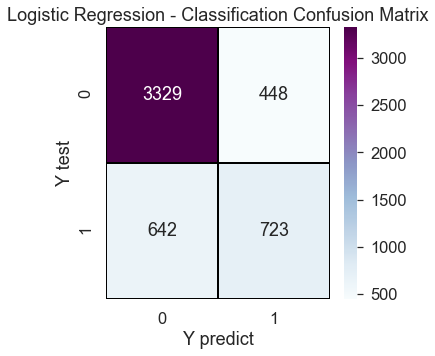

In [51]:
# The confusion matrix
sns.set(font_scale = 1.5)
logistic_regression_cm = confusion_matrix(y_test, 
                                          logistic_regression4.predict(X_test))
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logistic_regression_cm, 
            annot=True, 
            linewidth=0.7, 
            linecolor='black', 
            fmt='g', 
            ax=ax, 
            cmap="BuPu")
plt.title('Logistic Regression - Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

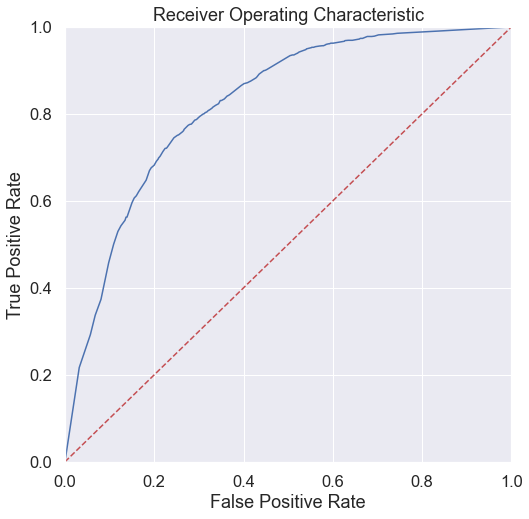

In [52]:
probs = logistic_regression4.predict_proba(X_test)
# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Model Evaluation

In [53]:
# Create a list which contains classifiers 
classifiers = []
classifiers.append(logistic_regression1)
classifiers.append(logistic_regression2)
classifiers.append(logistic_regression3)
classifiers.append(logistic_regression4)
print('Number of Classifiers: ',len(classifiers))

# Number of Cross Validations
cv = 10
print('Number of Cross Validations: ', cv, '\n','-'*40)

# Create a list which contains cross validation results for each classifier
cv_results = []
cv_results.append(res_1)
cv_results.append(res_2)
cv_results.append(res_3)
cv_results.append(res_4)

# for classifier in classifiers:
#     cv_results.append(cross_val_score(classifier, X_train, y_train, scoring = 'accuracy', cv = 10))
    
# Mean and standard deviation of cross validation results for each classifier  
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(round(cv_result.mean()*100,2))
    cv_std.append(round(cv_result.std(),4))

algos = ['Logistic Regression - Initial Run',
         'Logistic Regression - Second Run',
         'Logistic Regression - Third Run',
         'Logistic Regression - Forth Run'
        ]

acc_scores = [acc_logistic_regression1,
              acc_logistic_regression2,
              acc_logistic_regression3,
              acc_logistic_regression4
             ]

prec_scores = [prec_logistic_regression1,
               prec_logistic_regression2,
               prec_logistic_regression3,
               prec_logistic_regression4
              ]

recall_scores = [recall_logistic_regression1,
                 recall_logistic_regression2,
                 recall_logistic_regression3,
                 recall_logistic_regression4
                ]

f1_scores = [f1_logistic_regression1,
             f1_logistic_regression2,
             f1_logistic_regression3,
             f1_logistic_regression4
            ]

    
cv_res = pd.DataFrame({'Algorithm': algos,
                       'Initial Accuracy Scores': acc_scores,
                       'Cross Validation Mean': cv_mean, 
                       'Cross Validation Std': cv_std,
                       'Precision Score': prec_scores,
                       'Recall Scores': recall_scores,
                       'F1 Scores': f1_scores
                       })

cv_res.sort_values(by = 'F1 Scores', ascending = False).set_index('Algorithm')

Number of Classifiers:  4
Number of Cross Validations:  10 
 ----------------------------------------


,Initial Accuracy Scores,Cross Validation Mean,Cross Validation Std,Precision Score,Recall Scores,F1 Scores
Algorithm,,,,,,
Logistic Regression - Initial Run,79.97,80.48,0.03,65.58,51.65,57.79
Logistic Regression - Second Run,79.85,79.69,0.02,65.33,51.36,57.51
Logistic Regression - Forth Run,78.80,78.64,0.03,61.74,52.97,57.02
Logistic Regression - Third Run,78.20,78.48,0.03,60.48,51.58,55.67


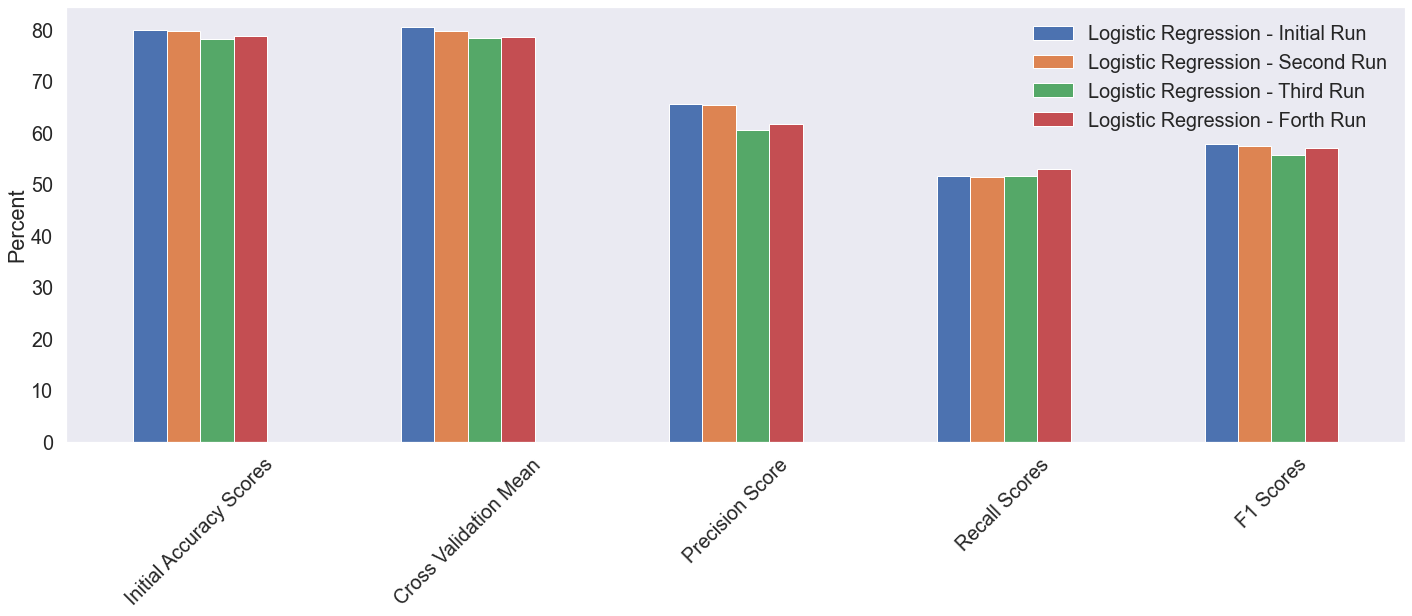

In [54]:
cv_res1 = cv_res.drop(columns='Cross Validation Std').set_index('Algorithm').T
sns.set(font_scale = 1.8)
fig, ax = plt.subplots(figsize=(24,8))
cv_res1.plot(kind='bar', ax=ax)
plt.xticks(rotation = 45)
plt.ylabel('Percent')
plt.legend(loc='top right')
ax.grid();

## Visualize F1 Scores to Identify the Best Model

Text(0.5, 1.0, 'F1 Scores')

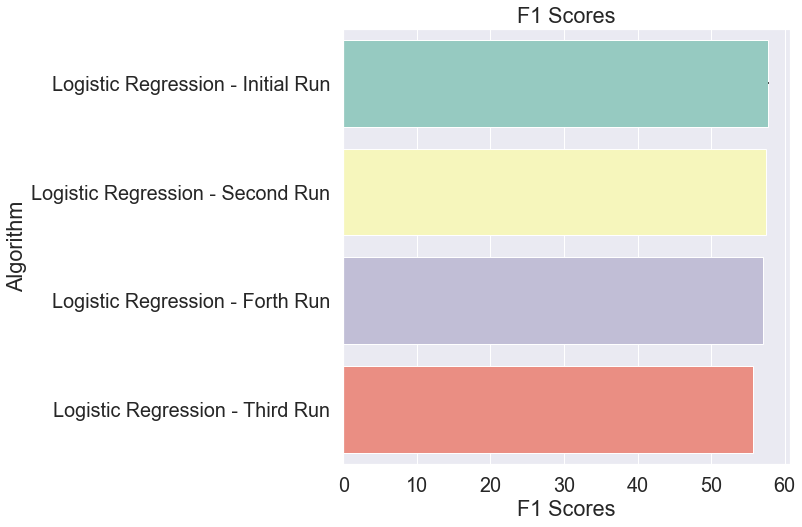

In [55]:
sns.barplot('F1 Scores', 
            'Algorithm', 
            data = cv_res, 
            order = cv_res.sort_values(by = 'F1 Scores', 
                                       ascending = False)['Algorithm'], 
            palette = 'Set3', 
            **{'xerr': cv_std})

plt.ylabel('Algorithm')
plt.title('F1 Scores')

## Receiver Operating Characteristic Curve

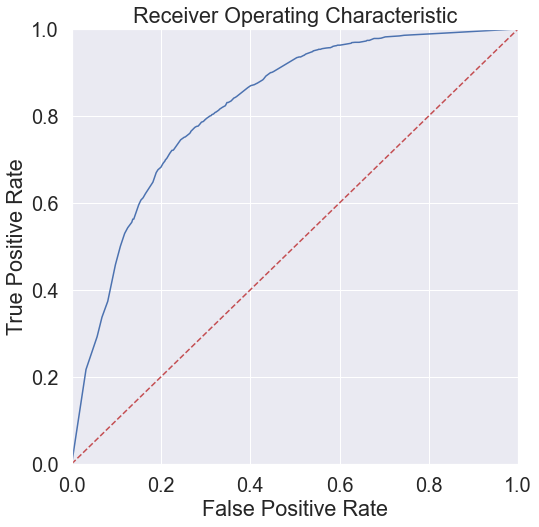

In [56]:
probs = logistic_regression4.predict_proba(X_test)
# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Combine Prediction Results to Test Dataset

In [57]:
x

,PaperlessBilling,Contract_Month-to-month,PaymentMethod_Electronic check,InternetService_Fiber optic,OnlineSecurity_No,OnlineBackup_No,TechSupport_No
0,1,1,1,0,1,0,1
1,0,0,0,0,0,1,1
2,1,1,0,0,0,0,1
3,0,0,0,0,0,1,0
4,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
7038,1,0,0,0,0,1,0
7039,1,0,0,1,1,0,1
7040,1,1,1,0,0,1,1
7041,1,1,0,1,1,1,1


In [58]:
Y_pred = logistic_regression4.predict_proba(x)[:, 1]
Y_pred

array([0.38954551, 0.05255497, 0.2151572 , ..., 0.40567361, 0.59735746,
       0.09909136])

In [59]:
df.reset_index(inplace=True)

In [60]:
df

,index,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Female,0,1,0,1.00,No phone service,DSL,No,Yes,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,Male,0,0,0,34.00,No,DSL,Yes,No,Yes,No,No,One year,0,Mailed check,56.95,1889.50,0
2,2,Male,0,0,0,2.00,No,DSL,Yes,Yes,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,3,Male,0,0,0,45.00,No phone service,DSL,Yes,No,Yes,Yes,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,4,Female,0,0,0,2.00,No,Fiber optic,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,Male,0,1,1,24.00,Yes,DSL,Yes,No,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,7039,Female,0,1,1,72.00,Yes,Fiber optic,No,Yes,Yes,No,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,7040,Female,0,1,1,11.00,No phone service,DSL,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,7041,Male,1,1,0,4.00,Yes,Fiber optic,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [61]:
print('The number of customers in this prediction is: ' ,len(Y_pred))

The number of customers in this prediction is:  7043


In [62]:
submit = pd.DataFrame({'index': df['index'], 'Churn_Pred': Y_pred})
submit = submit[['Churn_Pred']]
submit

,Churn_Pred
0,0.39
1,0.05
2,0.22
3,0.04
4,0.69
...,...
7038,0.05
7039,0.14
7040,0.41
7041,0.60


In [63]:
df = df.join(submit)
df.drop(columns='index', inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Pred
0,Female,0,1,0,1.00,No phone service,DSL,No,Yes,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,0.39
1,Male,0,0,0,34.00,No,DSL,Yes,No,Yes,No,No,One year,0,Mailed check,56.95,1889.50,0,0.05
2,Male,0,0,0,2.00,No,DSL,Yes,Yes,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,0.22
3,Male,0,0,0,45.00,No phone service,DSL,Yes,No,Yes,Yes,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,0.04
4,Female,0,0,0,2.00,No,Fiber optic,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24.00,Yes,DSL,Yes,No,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0,0.05
7039,Female,0,1,1,72.00,Yes,Fiber optic,No,Yes,Yes,No,Yes,One year,1,Credit card (automatic),103.20,7362.90,0,0.14
7040,Female,0,1,1,11.00,No phone service,DSL,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0,0.41
7041,Male,1,1,0,4.00,Yes,Fiber optic,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1,0.60


In [64]:
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [65]:
df['Prediction_Score'] = round(df['Churn_Pred']*100, -1)
pd.value_counts(df['Prediction_Score'], dropna=False)

0.00     1808
10.00    1508
60.00     780
20.00     712
50.00     660
70.00     574
40.00     537
30.00     464
Name: Prediction_Score, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002540DF18B38>]],
      dtype=object)

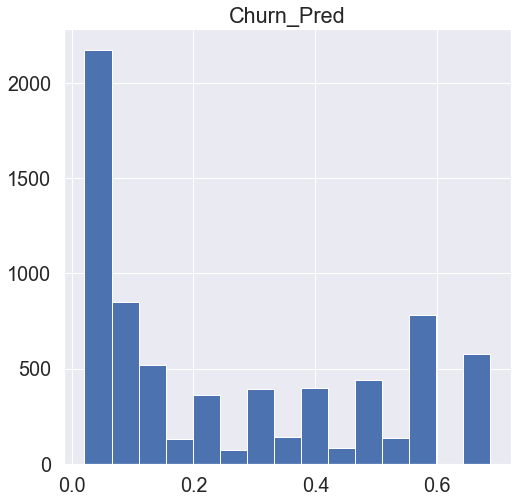

In [66]:
df.hist('Churn_Pred', bins=15)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

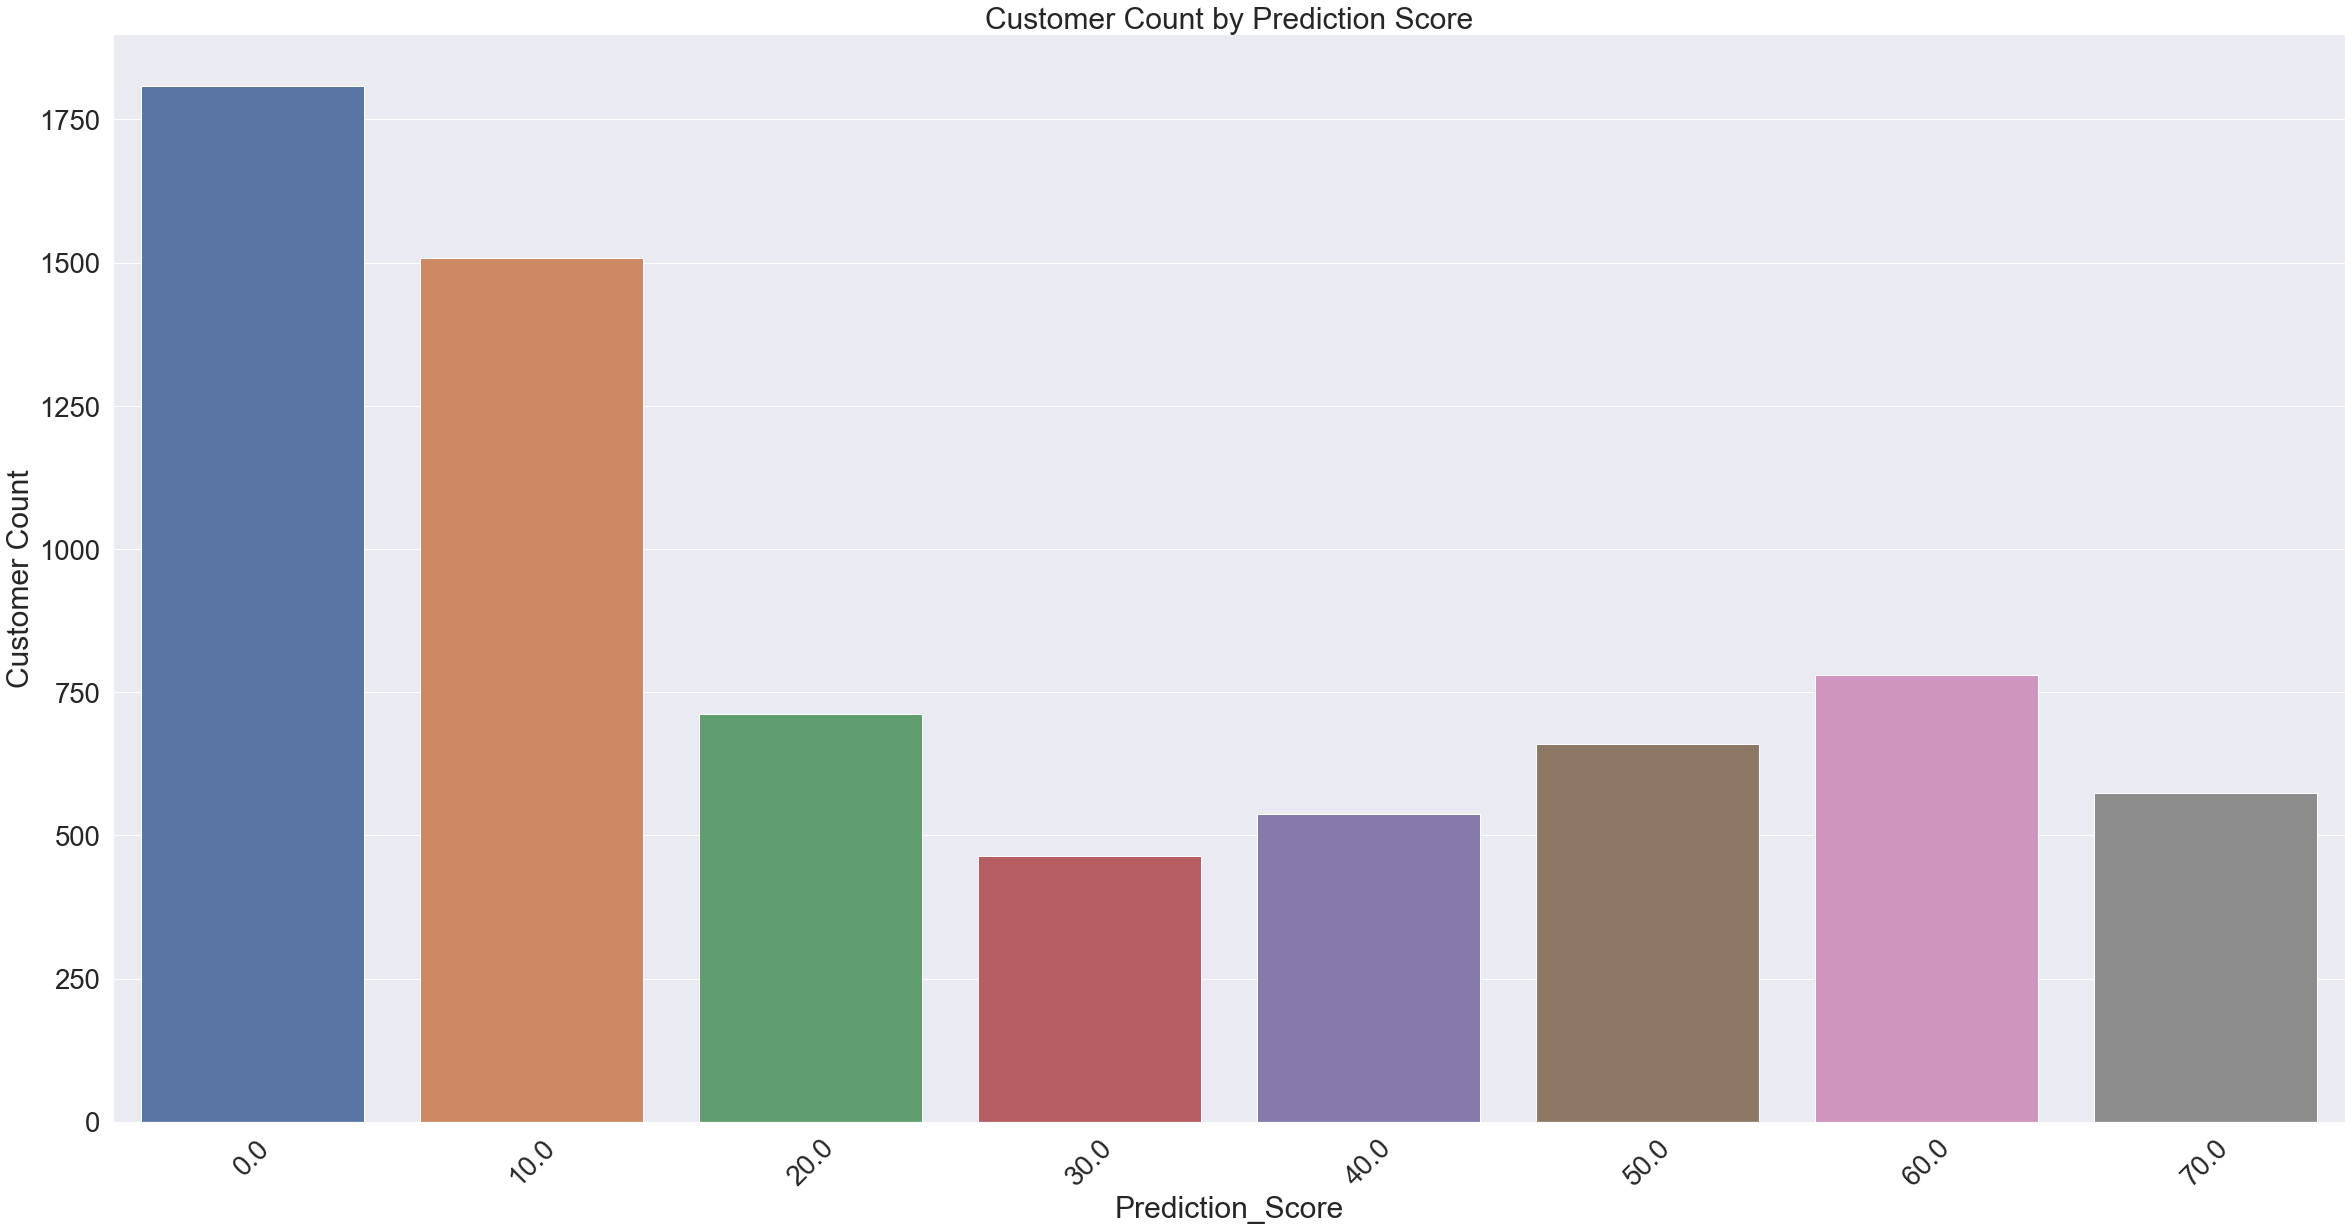

In [67]:
plt.figure(figsize = (40,20))
sns.set(font_scale = 2.5)


var = df['Prediction_Score']
sns.countplot(x = var,
            data = df)

plt.ylabel('Customer Count')
plt.title('Customer Count by Prediction Score')
plt.xticks(rotation = 45)
    

# Model Interpretation

In [68]:
model  = pd.DataFrame({"Features": X_train_sm.columns,"Coefficient":res.params.values})
model["Odds_Ratio"] = model["Coefficient"].apply(lambda x: np.exp(x))
model[["Coefficient","Odds_Ratio"]] = model[["Coefficient","Odds_Ratio"]].apply(lambda x: round(x,2))
model["Perc_Impact"] = model["Odds_Ratio"].apply(lambda x: (x-1)*100)
model.sort_values(by='Odds_Ratio', ascending=False)

,Features,Coefficient,Odds_Ratio,Perc_Impact
2,Contract_Month-to-month,1.77,5.88,488.00
4,InternetService_Fiber optic,0.73,2.07,107.00
6,OnlineBackup_No,0.52,1.69,69.00
5,OnlineSecurity_No,0.45,1.57,57.00
7,TechSupport_No,0.42,1.52,52.00
1,PaperlessBilling,0.40,1.49,49.00
3,PaymentMethod_Electronic check,0.39,1.48,48.00
0,const,-3.88,0.02,-98.00


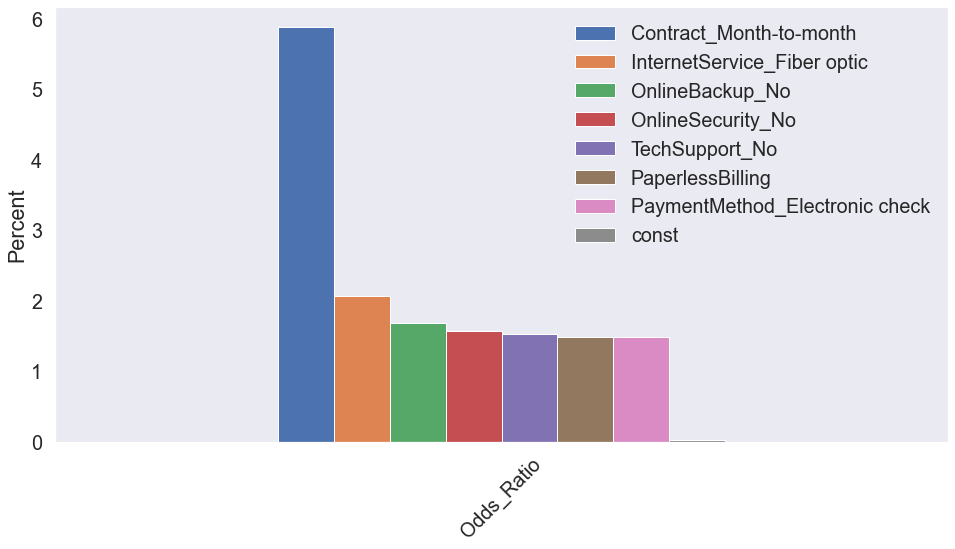

In [69]:
model_int = model.drop(columns=['Perc_Impact', 'Coefficient']).set_index('Features').T
model_int= model_int[['Contract_Month-to-month',
                      'InternetService_Fiber optic',
                      'OnlineBackup_No',
                      'OnlineSecurity_No',  
                      'TechSupport_No',
                      'PaperlessBilling', 
                      'PaymentMethod_Electronic check',
                      'const']]

sns.set(font_scale = 1.8)
fig, ax = plt.subplots(figsize=(16,8))
model_int.plot(kind='bar', ax=ax)
plt.xticks(rotation = 45)
plt.ylabel('Percent')
plt.legend(loc='top right')
ax.grid();

# END